# Homework Assignment 2

Due February 14th at **10am**.  The pre-grading script should be up and running by Friday afternoon and will give you feedback in the **Task 5** item.  A note will be posted on CourseSpaces once the script is running.  Please save your assignment notebook in your **mp248** repo as **mp248/Assignment.2/Assignment.2.ipynb**. 


## P1: Quiz 2, extended. 

In this problem we ask you to extend your code from the second quiz. Recall the function

$$ f(n) = \left\{ \matrix{n/2 & if \ n \ even \cr 3n+1 & if \ n \ odd} \right.$$

In the quiz, we asked you to apply $f$ repeatedly to integer inputs and keep track of how many iterations it took until you found the integer $1$. 

Write some code that computes a **dictionary**, $L$, where $L[k]$ is the number of times one needs to apply $f$ to turn $k$ into $1$, eg: $L[1]=0$, $L[2]=1$.

Consider the function $T(k) = L[1] + L[2] + \cdots + L[k]$.   Make a plot of $T(k)$ for $k=1,2,3, \cdots, 10000$.  Do a least squares interpolation on this plot, for both (a) a linear and (b) a quadratic fitting.   Try it again on the plot for $k=1,2,3, \cdots, 100000$.  Does it look like the least squares fittings are converging?   Plot the data together with the least-squares interpolation.  Provide a suitable title and legend -- include the coefficients of the least-squares fitting in the legend.

For the purposes of the pre-grading script, print out the values of $T(10)$, $T(100)$, $T(1000)$, $T(10000)$, and $T(100000)$. Put the values in a 5-element list, and print out that list.

**Note**: We will discuss least squares in the Monday Feb. 11th class.

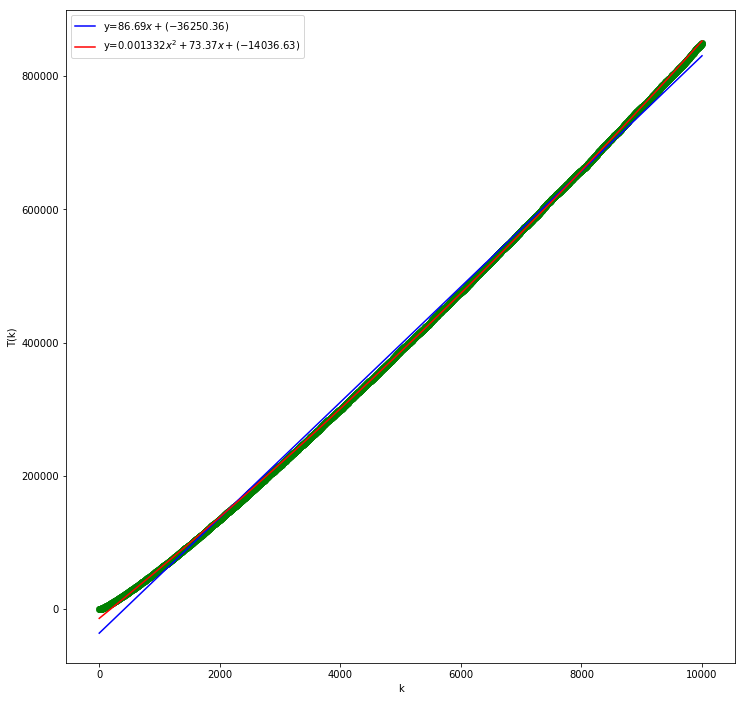

In [34]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#define a function to calculate the iteration that is needed to find the integer 1
def func_f(n):
    if n ==1:
        return 0
    else:
        count = 0
        result = n
        while(result!=1):
            count+=1
            if result%2 == 0:
                result = result//2
            else:
                result = result*3+1
        return count

def calculate_L_k(k):
    L = []
    for i in range(1,k+1):
        L.append(func_f(i))
    return L

def plot_fun(k):
    final_result = calculate_L_k(k)
    X = [i for i in range(1,k+1)]
    Y = [sum(final_result[0:item]) for item in X] #sum the first k L_k, then we get T_k
    plt.figure(figsize=(12,12))
    plt.xlabel("k")
    plt.ylabel("T(k)")

    #fitting with linear and quadratic
    linear_A = np.matrix([[1.0,x] for x in X]).T
    quadratic_A = np.matrix([[1.0,x,x**2] for x in X]).T
    y = np.matrix(Y).T

    linear_c = np.linalg.inv(linear_A*linear_A.T)*linear_A*y
    quadratic_c = np.linalg.inv(quadratic_A*quadratic_A.T)*quadratic_A*y


    dom = np.linspace(min(X), max(X), 1000)
    linear_ran = [linear_c[0,0] + linear_c[1,0]*x  for x in dom]
    quadratic_ran = [quadratic_c[0,0] + quadratic_c[1,0]*x + quadratic_c[2,0]*x**2 for x in dom]
    #plot linear fitting
    plt.plot(dom, linear_ran, 'b-', label='y=$%2.2fx+(%2.2f)$' %(linear_c[1,0], linear_c[0,0]))
    #plot quadratic fitting
    plt.plot(dom, quadratic_ran, 'r-', label='y=$%2.6fx^2+%2.2fx+(%2.2f)$' %(quadratic_c[2,0],quadratic_c[1,0], quadratic_c[0,0]))
    plt.legend()

    # plt.plot(x,y)
    plt.scatter(X,Y,color = "green", alpha = 0.3)
    plt.show()
    return final_result

final_result = plot_fun(10000)#change the value to 10000, 10000 is too big, takes a long time

    

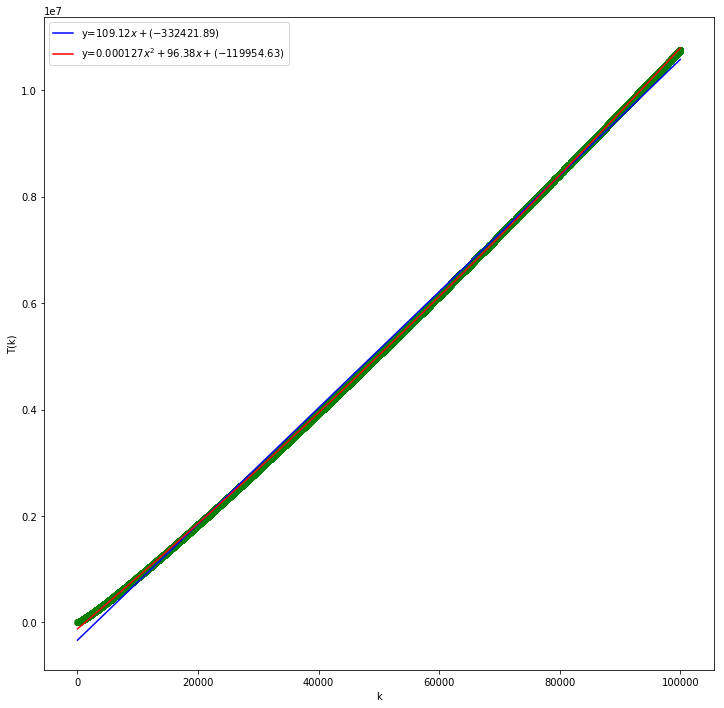

In [35]:
final_result = plot_fun(100000) #change the value to 100000

In [36]:

# print the value of T(10), T(100), T(1000), T(10000), T(100000)   
test_k = [10, 100, 1000, 10000, 100000]
result = [sum(final_result[0:x])for x in test_k]
print("The result of T(10), T(100), T(1000), T(10000), T(100000) in a list is: ",result)


The result of T(10), T(100), T(1000), T(10000), T(100000) in a list is:  [67, 3142, 59542, 849666, 10753840]


## P2 : Simple Equation Solver

While Newton's method is an excellent way to solve equations, in practice there is a more reliable way to solve equations, called the **subdivision method**. 

The heart of the subdivision method is the **intermediate value theorem** which states that if a function $f: [a,b] \to \mathbb R$ is *continuous* then for any $y_0$ between $f(a)$ and $f(b)$ (not equal to $f(a)$ or $f(b)$), there exists $t_0 \in (a,b)$ with $f(t_0) = y_0$. This theorem is the inspiration for:

**The Subdivision method** for solving $f(t)=0$. 

Given a continuous function $f : [a,b] \to \mathbb R$ with $f(a)$ and $f(b)$ having opposite signs (in particular, not zero), let $t_0$ be the *mid-point* of the interval $[a,b]$ i.e. $t_0 = \frac{a+b}{2}$.  We know by the intermediate value theorem that $f(t)=0$ has a solution in the interval.  Moreover, if $f(t_0)$ has the same sign as $f(b)$, then by the intermediate value theorem, a solution *must be* in the interval $[a,t_0]$.  Similarly, if $f(t_0)$ has the same sign as $f(a)$, a solution *must be* in the interval $[t_0,b]$. 

The *subdivision method* is to repeat this process of replacing the interval $[a,b]$ by either $[a,t_0]$ or $[t_0,b]$ until your interval is shorter than your acceptable error in approximation. 

**The problem** Write a Python function *subdiv(f,x,a,b,eps)* that takes as input a sympy function $f$ with variable $x$, with left endpoint $a$ and right endpoint $b$. *eps* is your acceptable amount of error.  The function subdiv will iterate the subdivision method until the interval containing a root is shorter than *eps*.  The function will return the endpoints of the interval, together with the number of iterations.  Find the root of $x^x-2$ in the interval $[1,2]$.  Set $eps = \frac{1}{10^k}$ for $k=1,2,3,4,5,6$, printing the output of *subdiv* in each case.

**Hint** When solving for the root of $x^x-2$, using endpoints $1.0$ and $2.0$ with *eps=0.5*, *subdiv* should take only one iteration. Using *eps=1.0* it should take zero.

In [37]:
import sympy as sp
import numpy as np

x = sp.Symbol("x") #define the symbol x
f = x**x-2 # define the function x**x -2


#define the subdivision function
def subdiv(f,x, a, b, eps):
    count = 0   # iteration count 
    lower = a   # left endpoints
    upper = b   # right endpoints
    while((upper-lower)>eps):  #check whether the interval is smaller than the eps
        count+=1   # increase the count first
        mid = (lower+upper)/2   
        f_mid = f.subs(x,mid)  # calculate the value at mid point
        f_lower = f.subs(x,lower)  
        f_upper = f.subs(x,upper)
        if(np.sign(f_mid) == np.sign(f_upper)):   #compare the sign and make decision
            lower = lower
            upper = mid
        elif(np.sign(f_mid) == np.sign(f_lower)):
            lower = mid
            upper = upper
        else:
            count -=1
            break
    return [lower, upper, count]   # return the values within a list

print("{0:2s}\t{1:22s}\t{2:22s}\t{3:15s}".format("k", "left endpoint", "right endpoint", "iteration times"))
for i in range(1,7):
    eps = sp.Integer(1)/sp.Integer(10**i)
    l = subdiv(f,x,1.0,2.0,eps)
    print("{0:1d}\t{1:22.20f}\t{2:22.20f}\t{3:8d}".format(i, l[0], l[1], l[2]))

k 	left endpoint         	right endpoint        	iteration times
1	1.50000000000000000000	1.56250000000000000000	       4
2	1.55468750000000000000	1.56250000000000000000	       7
3	1.55957031250000000000	1.56054687500000000000	      10
4	1.55957031250000000000	1.55963134765625000000	      14
5	1.55960845947265625000	1.55961608886718750000	      17
6	1.55961036682128906250	1.55961132049560546875	      20


## P3: Extended Newton method example.

Recall Newton's method for finding the roots of $z^3-1$.  The iterator is

$$N(z) = z-\frac{f(z)}{f'(z)} = z - \frac{z^3-1}{3z^2} = \frac{2z^3+1}{3z^2}$$

In this problem we ask you to use Sympy to find the points in the plane where Newton's method eventually fails, i.e. find all the initial 
conditions $z_0$ such that $N^{(k)}(z_0) = 0$ for some $k$.  Clearly, Newton's method fails for $z_0 = 0$, with $k=0$, i.e. it fails immediately.  We say Newton's method fails in one step if $N^{(1)}(z_0) = 0$, and two steps if $N^{(2)}(z_0)=0$, etc. 

Plot the points where Newton's method fails in $k$ steps for $k=0,1,2,3,4,\cdots, 10$.  Use a different color for each $k$. 

We denote the set where Newton's method fails in $k$ steps by $F_k$. 

$$F_0 = \{0\}$$

and

$$F_k = \{ z_0 : N(z_0) = \frac{2z_0^3+1}{3z_0^2} \in F_{k-1} \}$$

Thus, provided we know $F_{k-1}$ we can solve for $F_k$, as the solution set to the equation

$$ F_k = \{ z_0 : 2z_0^3+1 = 3f_{k-1}z_0^2, f_{k-1} \in F_{k-1} \}$$

$$F_k = \{ z_0 : 2z_0^3-3f_{k-1}z_0^2+1 = 0, f_{k-1} \in F_{k-1} \}$$

We can solve this equation exactly in closed form using Sympy -- you will likely find this slow. 

More pragmatically, we can solve it using complex floats with the [*mpmath*](http://mpmath.org/doc/current/calculus/polynomials.html) library. 

**Advice** Please use a careful choice of *markersize* in your point plot so that you can see the underlying shape of the scatter plot. i.e. try to avoid big points crowding each other out. Also set *figsize* to (12,12), to ensure your plot is reasonably large.

**Advice** Choose your *xlim* and *ylim* so that your image $x$ and $y$ coordinates vary between $-2$ and $2$. As you will see, there *are* solutions outside of this square, but they are rather rare, and having them in the plot wrecks the scale.

Use **%matplotlib inline** to ensure your plots are saved in your notebook.  

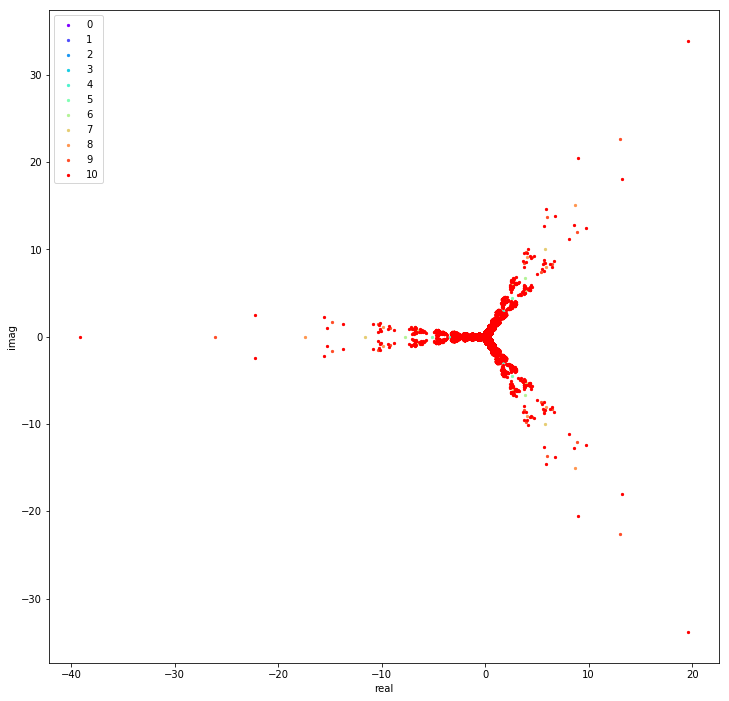

In [38]:
import sympy as sp 
import matplotlib.pyplot as plt
import numpy as np
from mpmath import *
import matplotlib.cm as cm


k_range = 10  #define a variable to store k

dic_F = [[0]]  #define a list to store the set of Fk
#define a function to calculate the solution set of Fk
def cal_roots(k):
    total_roots = []
    for item in dic_F[k-1]: # we use each z0 belongs to Fk-1 to calculate the solution of Fk
        roots = polyroots([2,-3*item,0,1])
        for r in roots:
            total_roots.append(r)
    dic_F.append(total_roots)

for i in range(1,k_range+1):
    cal_roots(i)
    

colors = cm.rainbow(np.linspace(0, 1, len(dic_F)))#set different color for each k
plt.figure(figsize=(12,12))
plt.xlabel("real")
plt.ylabel("imag")
k_list = [i for i in range(k_range+1)] 
for k, y, c in zip(k_list, dic_F,colors):
    plt.scatter( [j.real for j in y], [j.imag for j in y], s= 5,color = c, label = str(k))
plt.legend()
plt.show()




## To show the detail of different points of k, we illustrate the first 6 values, that's k = 0, 1,2,3,4,5

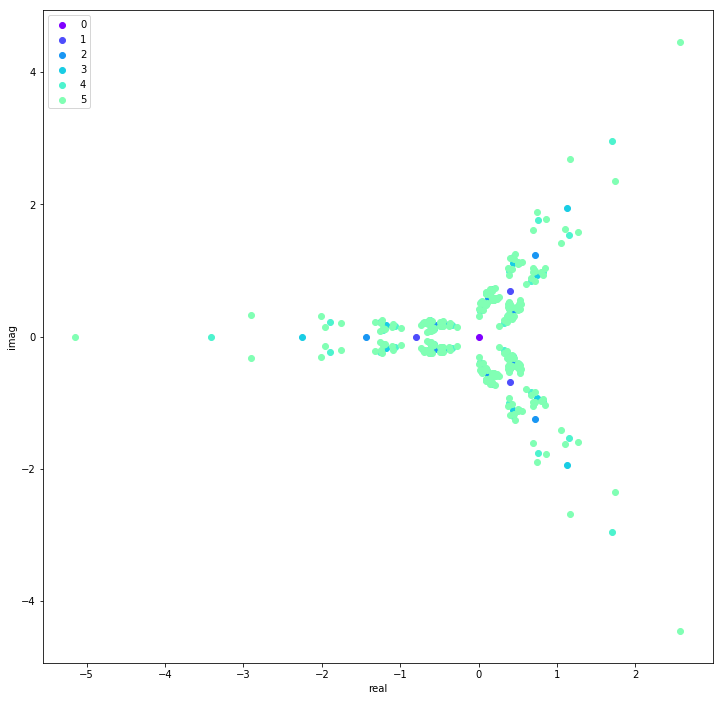

In [39]:
plt.figure(figsize=(12,12))
plt.xlabel("real")
plt.ylabel("imag")
for k, y, c in zip(k_list[0:6],dic_F[0:6],colors[0:6]):
    plt.scatter( [j.real for j in y], [j.imag for j in y],color = c, label = str(k))
plt.legend()
plt.show()



## P4: Doubling roots

Recall our *doubling function* $f$ from the start of the Sympy notebook (7).   One way to express it is via the floor function $\lfloor x \rfloor$ 

$$f(x) = 2x - \lfloor 2x \rfloor.$$

The floor function $\lfloor x \rfloor$ is the largest integer $k$ with $k \leq x$.  

Using Python and the Sympy library, compute the iterates $f^{(k)}(\sqrt{2})$ for $k=0,1,2,\cdots, 1000$.  By iterates we mean 
$$f^{(0)}(\sqrt{2}) = \sqrt{2}$$
$$f^{(1)}(\sqrt{2}) = f(\sqrt{2})$$
$$f^{(2)}(\sqrt{2}) = f(f(\sqrt{2}))$$ 
$$f^{(3)}(\sqrt{2}) = f(f(f(\sqrt{2})))$$

Verify that $f^{(i)}(\sqrt{2}) \neq f^{(j)}(\sqrt{2})$ if and only if $i \neq j$. **NOTE** this line had a typo in the initial homework draft.  This "verify" request is for your own sanity -- you do not need to show us why this is true.

Using the sort function (**sorted**) linearize the iterates, i.e. compute a sequence $j_0, j_1, \cdots, j_{1000}$ such that

$$f^{(j_0)}(\sqrt{2}) < f^{(j_1)}(\sqrt{2}) < \cdots < f^{(j_{1000})}(\sqrt{2}).$$

Store the sequence $J = (j_0, j_1, \cdots, j_{1000})$ as a list, and print it.

**Note**: If Sympy's implementation of the inequality $<$ fails you, perhaps work around it creatively using *evalf*. 

If you have trouble answering this question for **1000** iterations, as asked, you will get partial credit for a correct answer for **200**, **400**, **600** or **800** iterations, respectively.  You will receive more partial credit the closer you are to **1000** points. But please do not answer this question for any other number of iterations as the pre-grading script will not look for that answer.   As a sanity check, note that any answer to this problem for **1000** iterations should be a list with **1001** elements.

In [42]:
import sympy as sp 
import numpy as np
import operator
x = sp.Symbol("x")
f = 2*x

def iterate_K(k):
    value = np.sqrt(2)
    result = value
    # print(type(f.subs(x,result)))
    while(k>0):
        result = f.subs(x,result).evalf(40)-int(f.subs(x,result).evalf(40))
        k-=1
    return result

#Set the value of iterations here, if we want 1000, then asign 1000 to variable iterations
iterations = 1000
res_dic = {i:iterate_K(i) for i in range(iterations)}
sorted_result = sorted(res_dic.items(),key=operator.itemgetter(1)) # sort the dictionary by values, the return value is a list of tuples
# extract the required list J
list_J = []
for item in sorted_result:
    list_J.append(item[0])
print("The list of J is:")
print(list_J)



The list of J is:
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 2